In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [58]:

df = pd.read_excel("./Data/all_schedules.xlsx")


df['team'] = df['team'].astype(str)
df['Opponent'] = df['Opponent'].astype(str)

#ignore comments in this cell

# create new column with sorted team names
#df['matchup'] = df.apply(lambda row: '-'.join(sorted([row['team'], row['Opponent']])), axis=1)

# create unique identifier for each matchup
#df['matchup_id'] = df['New Date'].astype(str) + '-' + df['team']

# drop duplicate rows based on matchup_id
#df = df.drop_duplicates(subset='matchup_id')

# drop matchup and matchup_id columns
#df = df.drop(columns=['matchup', 'matchup_id']) #filter out games that are repeated on the same day... do we need to do this?


df

,G,Date,New Date,Type,Site,Opponent,Conf,SRS,W/L,Tm,Opp,OT,W,L,Streak,Arena,team,formatted_team,Margin,Year
0,1,"Fri,",2015-11-13,REG,H,University of the Southwest,NaN,NaN,W,94.0,63.0,NaN,1.0,0.0,W 1,Moody Coliseum,Abilene Christian,abilene-christian,31,2016
1,1,"Fri,",2015-11-13,REG,A,Southern Illinois,MVC,2.79,L,75.0,77.0,NaN,0.0,1.0,L 1,SIU Arena,Air Force,air-force,-2,2016
2,1,"Fri,",2015-11-13,REG,H,Kennesaw State,A-Sun,-8.58,W,77.0,64.0,NaN,1.0,0.0,W 1,Coleman Coliseum,Alabama,alabama,13,2016
3,1,"Fri,",2015-11-13,REG,A,Tulane,AAC,-0.85,W,68.0,67.0,OT,1.0,0.0,W 1,Devlin Fieldhouse,Alabama A&M,alabama-am,1,2016
4,1,"Fri,",2015-11-13,REG,A,Kentucky,SEC,20.23,L,65.0,78.0,NaN,0.0,1.0,L 1,Rupp Arena,Albany,albany-ny,-13,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57804,35,"Sun,",2023-03-19,CBI,N,Eastern Kentucky,A-Sun,-2.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean Center,Cleveland St.,cleveland-state,0,2023
57805,31,"Sun,",2023-03-19,CBI,N,Milwaukee,Horizon,-4.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean Center,Stetson,stetson,0,2023
57806,34,"Sun,",2023-03-19,CBI,N,Tarleton State,WAC,-0.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean Center,Radford,radford,0,2023
57807,34,"Sun,",2023-03-19,CBI,N,Duquesne,A-10,4.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ocean Center,Rice,rice,0,2023


In [59]:
df.head()

,G,Date,New Date,Type,Site,Opponent,Conf,SRS,W/L,Tm,Opp,OT,W,L,Streak,Arena,team,formatted_team,Margin,Year
0,1,"Fri,",2015-11-13,REG,H,University of the Southwest,NaN,NaN,W,94.0,63.0,NaN,1.0,0.0,W 1,Moody Coliseum,Abilene Christian,abilene-christian,31,2016
1,1,"Fri,",2015-11-13,REG,A,Southern Illinois,MVC,2.79,L,75.0,77.0,NaN,0.0,1.0,L 1,SIU Arena,Air Force,air-force,-2,2016
2,1,"Fri,",2015-11-13,REG,H,Kennesaw State,A-Sun,-8.58,W,77.0,64.0,NaN,1.0,0.0,W 1,Coleman Coliseum,Alabama,alabama,13,2016
3,1,"Fri,",2015-11-13,REG,A,Tulane,AAC,-0.85,W,68.0,67.0,OT,1.0,0.0,W 1,Devlin Fieldhouse,Alabama A&M,alabama-am,1,2016
4,1,"Fri,",2015-11-13,REG,A,Kentucky,SEC,20.23,L,65.0,78.0,NaN,0.0,1.0,L 1,Rupp Arena,Albany,albany-ny,-13,2016


In [60]:
team_stats = pd.read_excel("./Data/all_cbb_data.xlsx")
team_stats = team_stats.iloc[:, : 24]



In [61]:
merged = df.merge(team_stats, left_on=['team', 'Year'], right_on=['TEAM', 'Year'])
merged


,G_x,Date,New Date,Type,Site,Opponent,Conf,SRS,W/L,Tm,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED
0,1,"Fri,",2015-11-13,REG,H,University of the Southwest,NaN,NaN,W,94.0,...,40.3,46.5,48.4,54.2,36.3,36.9,68.4,-14.400000,NaN,NaN
1,2,"Tue,",2015-11-17,REG,H,Howard Payne,NaN,NaN,W,70.0,...,40.3,46.5,48.4,54.2,36.3,36.9,68.4,-14.400000,NaN,NaN
2,3,"Sun,",2015-11-22,REG,A,Portland,WCC,-2.21,L,57.0,...,40.3,46.5,48.4,54.2,36.3,36.9,68.4,-14.400000,NaN,NaN
3,4,"Tue,",2015-11-24,REG,A,Colorado State,MWC,2.31,L,100.0,...,40.3,46.5,48.4,54.2,36.3,36.9,68.4,-14.400000,NaN,NaN
4,5,"Fri,",2015-11-27,REG,N,Florida A&M,MEAC,-21.74,W,72.0,...,40.3,46.5,48.4,54.2,36.3,36.9,68.4,-14.400000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57804,29,"Fri,",2023-02-24,REG,H,UC Riverside,Big West,1.14,L,52.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.397267,NaN,NaN
57805,30,"Sat,",2023-02-25,REG,H,UC Irvine,Big West,5.07,W,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.397267,NaN,NaN
57806,31,"Thu,",2023-03-02,REG,A,Cal State Northridge,Big West,-9.95,W,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.397267,NaN,NaN
57807,32,"Sat,",2023-03-04,REG,A,UC Santa Barbara,Big West,3.87,L,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.397267,NaN,NaN


Training Set and Testing set will be filtered to correct features and values in later steps

In [62]:
training_set = merged
training_set

,G_x,Date,New Date,Type,Site,Opponent,Conf,SRS,W/L,Tm,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED
0,1,"Fri,",2015-11-13,REG,H,University of the Southwest,NaN,NaN,W,94.0,...,40.3,46.5,48.4,54.2,36.3,36.9,68.4,-14.400000,NaN,NaN
1,2,"Tue,",2015-11-17,REG,H,Howard Payne,NaN,NaN,W,70.0,...,40.3,46.5,48.4,54.2,36.3,36.9,68.4,-14.400000,NaN,NaN
2,3,"Sun,",2015-11-22,REG,A,Portland,WCC,-2.21,L,57.0,...,40.3,46.5,48.4,54.2,36.3,36.9,68.4,-14.400000,NaN,NaN
3,4,"Tue,",2015-11-24,REG,A,Colorado State,MWC,2.31,L,100.0,...,40.3,46.5,48.4,54.2,36.3,36.9,68.4,-14.400000,NaN,NaN
4,5,"Fri,",2015-11-27,REG,N,Florida A&M,MEAC,-21.74,W,72.0,...,40.3,46.5,48.4,54.2,36.3,36.9,68.4,-14.400000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57804,29,"Fri,",2023-02-24,REG,H,UC Riverside,Big West,1.14,L,52.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.397267,NaN,NaN
57805,30,"Sat,",2023-02-25,REG,H,UC Irvine,Big West,5.07,W,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.397267,NaN,NaN
57806,31,"Thu,",2023-03-02,REG,A,Cal State Northridge,Big West,-9.95,W,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.397267,NaN,NaN
57807,32,"Sat,",2023-03-04,REG,A,UC Santa Barbara,Big West,3.87,L,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.397267,NaN,NaN


In [63]:
#test = df
training_set["Winner"] = np.where(training_set['W/L'] == 'W', training_set['team'], training_set['Opponent'])
training_set.head()

,G_x,Date,New Date,Type,Site,Opponent,Conf,SRS,W/L,Tm,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,Winner
0,1,"Fri,",2015-11-13,REG,H,University of the Southwest,NaN,NaN,W,94.0,...,46.5,48.4,54.2,36.3,36.9,68.4,-14.4,NaN,NaN,Abilene Christian
1,2,"Tue,",2015-11-17,REG,H,Howard Payne,NaN,NaN,W,70.0,...,46.5,48.4,54.2,36.3,36.9,68.4,-14.4,NaN,NaN,Abilene Christian
2,3,"Sun,",2015-11-22,REG,A,Portland,WCC,-2.21,L,57.0,...,46.5,48.4,54.2,36.3,36.9,68.4,-14.4,NaN,NaN,Portland
3,4,"Tue,",2015-11-24,REG,A,Colorado State,MWC,2.31,L,100.0,...,46.5,48.4,54.2,36.3,36.9,68.4,-14.4,NaN,NaN,Colorado State
4,5,"Fri,",2015-11-27,REG,N,Florida A&M,MEAC,-21.74,W,72.0,...,46.5,48.4,54.2,36.3,36.9,68.4,-14.4,NaN,NaN,Abilene Christian


SELECT FEATURES FOR TRAINING SET HERE

In [64]:
training_set = training_set[['team', 'Opponent', "Winner", "W/L", "SRS", 'Site',"BARTHAG" ,"2P_O", "3P_O" ,"Year", "Type", "New Date"]]
training_set = training_set.dropna() #SVM CANNOT BE TRAINED ON NA DATA

print(len(training_set))
training_set.head()
training_set.reset_index(drop=True, inplace=True)
save = training_set.copy()
save


44361


,team,Opponent,Winner,W/L,SRS,Site,BARTHAG,2P_O,3P_O,Year,Type,New Date
0,Abilene Christian,Portland,Portland,L,-2.21,A,0.1529,48.4,36.3,2016,REG,2015-11-22
1,Abilene Christian,Colorado State,Colorado State,L,2.31,A,0.1529,48.4,36.3,2016,REG,2015-11-24
2,Abilene Christian,Florida A&M,Abilene Christian,W,-21.74,N,0.1529,48.4,36.3,2016,REG,2015-11-27
3,Abilene Christian,Oakland,Oakland,L,6.30,N,0.1529,48.4,36.3,2016,REG,2015-11-28
4,Abilene Christian,New Hampshire,New Hampshire,L,-7.89,H,0.1529,48.4,36.3,2016,REG,2015-12-03
...,...,...,...,...,...,...,...,...,...,...,...,...
44356,Canisius,Iona,Iona,L,-4.78,A,0.2539,52.0,32.4,2019,REG,2019-02-24
44357,Canisius,Niagara,Niagara,L,-11.33,H,0.2539,52.0,32.4,2019,REG,2019-02-27
44358,Canisius,Siena,Canisius,W,-7.90,H,0.2539,52.0,32.4,2019,REG,2019-03-01
44359,Canisius,Manhattan,Canisius,W,-12.89,N,0.2539,52.0,32.4,2019,CTOURN,2019-03-08


After label encoding in the next steps, split the dataset into training and testing sets based on the year

In [65]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder() #label encode anything that is a string... any new added features will need to be encoded if not numerical
converted_season = training_set
converted_season["team"]=encoder.fit_transform(training_set["team"])
converted_season["Opponent"]=encoder.fit_transform(training_set["Opponent"])
converted_season["Site"]=encoder.fit_transform(training_set["Site"]) #if site is 1 then it is a home game, 2 is neutral, 3 is away


converted_season.head()

,team,Opponent,Winner,W/L,SRS,Site,BARTHAG,2P_O,3P_O,Year,Type,New Date
0,0,280,Portland,L,-2.21,0,0.1529,48.4,36.3,2016,REG,2015-11-22
1,0,69,Colorado State,L,2.31,0,0.1529,48.4,36.3,2016,REG,2015-11-24
2,0,102,Abilene Christian,W,-21.74,2,0.1529,48.4,36.3,2016,REG,2015-11-27
3,0,261,Oakland,L,6.30,2,0.1529,48.4,36.3,2016,REG,2015-11-28
4,0,235,New Hampshire,L,-7.89,1,0.1529,48.4,36.3,2016,REG,2015-12-03


In [66]:
converted_season["Winner"] = np.where(converted_season['W/L'] == 'W', converted_season['team'], converted_season['Opponent'])
# changes the winner column to match up with the encoded winner

converted_season.head()

,team,Opponent,Winner,W/L,SRS,Site,BARTHAG,2P_O,3P_O,Year,Type,New Date
0,0,280,280,L,-2.21,0,0.1529,48.4,36.3,2016,REG,2015-11-22
1,0,69,69,L,2.31,0,0.1529,48.4,36.3,2016,REG,2015-11-24
2,0,102,0,W,-21.74,2,0.1529,48.4,36.3,2016,REG,2015-11-27
3,0,261,261,L,6.30,2,0.1529,48.4,36.3,2016,REG,2015-11-28
4,0,235,235,L,-7.89,1,0.1529,48.4,36.3,2016,REG,2015-12-03


In [67]:
converted_season = converted_season.drop(columns=["W/L"])

converted_season.head()

,team,Opponent,Winner,SRS,Site,BARTHAG,2P_O,3P_O,Year,Type,New Date
0,0,280,280,-2.21,0,0.1529,48.4,36.3,2016,REG,2015-11-22
1,0,69,69,2.31,0,0.1529,48.4,36.3,2016,REG,2015-11-24
2,0,102,0,-21.74,2,0.1529,48.4,36.3,2016,REG,2015-11-27
3,0,261,261,6.30,2,0.1529,48.4,36.3,2016,REG,2015-11-28
4,0,235,235,-7.89,1,0.1529,48.4,36.3,2016,REG,2015-12-03


In [68]:
converted_season.loc[converted_season["team"]==converted_season["Winner"],"team_game_win"]=2 #2 means that the team in the "team" column won
converted_season.loc[converted_season["team"]!=converted_season["Winner"],"team_game_win"]=1 #1 means they lost



converted_season.head()

,team,Opponent,Winner,SRS,Site,BARTHAG,2P_O,3P_O,Year,Type,New Date,team_game_win
0,0,280,280,-2.21,0,0.1529,48.4,36.3,2016,REG,2015-11-22,1.0
1,0,69,69,2.31,0,0.1529,48.4,36.3,2016,REG,2015-11-24,1.0
2,0,102,0,-21.74,2,0.1529,48.4,36.3,2016,REG,2015-11-27,2.0
3,0,261,261,6.30,2,0.1529,48.4,36.3,2016,REG,2015-11-28,1.0
4,0,235,235,-7.89,1,0.1529,48.4,36.3,2016,REG,2015-12-03,1.0


CORRELATION MATRIX



[notice] A new release of pip available: 22.1.2 -> 23.0.1
[notice] To update, run: C:\Users\divys\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


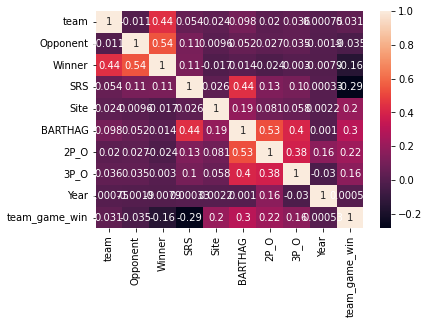

In [69]:
%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
corrmtx=converted_season.corr()
sns.heatmap(corrmtx,annot=True)
plt.show()

Extract any features that have high correlation. 

TRAINING DATA will be set to entire 2016-18 seasons and testing data will be set to 2019 NCAA tournament games

In [70]:

training_set = converted_season.loc[converted_season["Year"] <= 2018] # training set 
testing_set = converted_season.loc[(converted_season["Year"] == 2019) & (converted_season["Type"] == "NCAA")] # testing set

testing_set = testing_set.loc[(testing_set["New Date"] == "21-Mar-19") | (testing_set["New Date"] == "22-Mar-19")]

testing_set

,team,Opponent,Winner,SRS,Site,BARTHAG,2P_O,3P_O,Year,Type,New Date,team_game_win
33215,102,100,102,-6.09,2,0.9744,61.4,36.3,2019,NCAA,2019-03-21,2.0
33251,332,113,332,-2.61,2,0.9736,52.5,39.5,2019,NCAA,2019-03-22,2.0
33291,72,247,72,-4.01,2,0.9646,58.0,30.8,2019,NCAA,2019-03-22,2.0
33328,199,148,199,-4.78,2,0.9582,52.1,36.2,2019,NCAA,2019-03-22,2.0
33365,169,220,169,1.50,2,0.9665,51.8,34.2,2019,NCAA,2019-03-21,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
42788,84,123,123,27.79,2,0.3494,51.0,40.1,2019,NCAA,2019-03-21,1.0
43731,113,120,113,2.44,2,0.9439,51.3,35.5,2019,NCAA,2019-03-22,2.0
43766,174,265,265,15.30,2,0.8433,52.7,35.8,2019,NCAA,2019-03-22,1.0
43798,22,191,191,16.01,2,0.8138,59.2,37.0,2019,NCAA,2019-03-21,1.0


In [71]:
training_set = training_set.drop(["Year", "Type", "New Date"], axis=1) #drop year and type as they are not used for predictions only for data selection
testing_set = testing_set.drop(["Year", "Type", "New Date"], axis=1)

X_train=training_set.drop(["team_game_win"],axis=1).values
X_test = testing_set.drop(["team_game_win"],axis=1).values

print(len(X_train))
print(len(X_test))
X_train[:5]



33182
64


array([[ 0.000e+00,  2.800e+02,  2.800e+02, -2.210e+00,  0.000e+00,
         1.529e-01,  4.840e+01,  3.630e+01],
       [ 0.000e+00,  6.900e+01,  6.900e+01,  2.310e+00,  0.000e+00,
         1.529e-01,  4.840e+01,  3.630e+01],
       [ 0.000e+00,  1.020e+02,  0.000e+00, -2.174e+01,  2.000e+00,
         1.529e-01,  4.840e+01,  3.630e+01],
       [ 0.000e+00,  2.610e+02,  2.610e+02,  6.300e+00,  2.000e+00,
         1.529e-01,  4.840e+01,  3.630e+01],
       [ 0.000e+00,  2.350e+02,  2.350e+02, -7.890e+00,  1.000e+00,
         1.529e-01,  4.840e+01,  3.630e+01]])

In [72]:
Y_train=training_set["team_game_win"].values
Y_test = testing_set["team_game_win"].values
Y_train=Y_train.reshape(-1,1)
Y_test =Y_test.reshape(-1,1)

Y_train = Y_train.ravel()
Y_test = Y_test.ravel()

#Y_train

In [73]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

SVM CODE

In [74]:
kernels = ["linear", "rbf", "poly"]
# CS = [0.1, 1, 10]
CS = [10]

In [75]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

for C in CS:
    print("----------")
    print("C Value: ", C)
    svm_clf=SVC(C= C, gamma="auto", kernel="linear")
    svm_clf.fit(X_train,Y_train)
    Y_pred=svm_clf.predict(X_test)
    print("Precision: ", precision_score(Y_test, Y_pred), " | Recall: ", recall_score(Y_test, Y_pred), " | Accuracy: ", accuracy_score(Y_test, Y_pred), " | F1 Score: ", f1_score(Y_test, Y_pred))
    

----------
C Value:  10
Precision:  0.8181818181818182  | Recall:  0.5625  | Accuracy:  0.71875  | F1 Score:  0.6666666666666666


In [76]:
for C in CS:
    print("----------")
    print("C Value: ", C)
    svm_clf=SVC(C= C, gamma="auto", kernel="rbf")
    svm_clf.fit(X_train,Y_train)
    Y_pred=svm_clf.predict(X_test)
    rbf_ypred = Y_pred
    print("Precision: ", precision_score(Y_test, Y_pred), " | Recall: ", recall_score(Y_test, Y_pred), " | Accuracy: ", accuracy_score(Y_test, Y_pred), " | F1 Score: ", f1_score(Y_test, Y_pred))
    

----------
C Value:  10
Precision:  0.9393939393939394  | Recall:  0.96875  | Accuracy:  0.953125  | F1 Score:  0.9538461538461539


In [77]:
for C in CS:
    print("----------")
    print("C Value: ", C)
    svm_clf=SVC(C= C, gamma="auto", kernel="poly")
    svm_clf.fit(X_train,Y_train)
    Y_pred=svm_clf.predict(X_test)
    print("Precision: ", precision_score(Y_test, Y_pred), " | Recall: ", recall_score(Y_test, Y_pred), " | Accuracy: ", accuracy_score(Y_test, Y_pred), " | F1 Score: ", f1_score(Y_test, Y_pred))
    

----------
C Value:  10
Precision:  0.84375  | Recall:  0.84375  | Accuracy:  0.84375  | F1 Score:  0.84375


In [78]:
t = pd.DataFrame.from_dict({'pred': rbf_ypred, 'actual':Y_test.flatten()})


In [79]:
t

,pred,actual
0,2.0,2.0
1,2.0,2.0
2,2.0,2.0
3,2.0,2.0
4,2.0,2.0
...,...,...
59,1.0,1.0
60,2.0,2.0
61,1.0,1.0
62,1.0,1.0


In [80]:
save

,team,Opponent,Winner,W/L,SRS,Site,BARTHAG,2P_O,3P_O,Year,Type,New Date
0,Abilene Christian,Portland,Portland,L,-2.21,A,0.1529,48.4,36.3,2016,REG,2015-11-22
1,Abilene Christian,Colorado State,Colorado State,L,2.31,A,0.1529,48.4,36.3,2016,REG,2015-11-24
2,Abilene Christian,Florida A&M,Abilene Christian,W,-21.74,N,0.1529,48.4,36.3,2016,REG,2015-11-27
3,Abilene Christian,Oakland,Oakland,L,6.30,N,0.1529,48.4,36.3,2016,REG,2015-11-28
4,Abilene Christian,New Hampshire,New Hampshire,L,-7.89,H,0.1529,48.4,36.3,2016,REG,2015-12-03
...,...,...,...,...,...,...,...,...,...,...,...,...
44356,Canisius,Iona,Iona,L,-4.78,A,0.2539,52.0,32.4,2019,REG,2019-02-24
44357,Canisius,Niagara,Niagara,L,-11.33,H,0.2539,52.0,32.4,2019,REG,2019-02-27
44358,Canisius,Siena,Canisius,W,-7.90,H,0.2539,52.0,32.4,2019,REG,2019-03-01
44359,Canisius,Manhattan,Canisius,W,-12.89,N,0.2539,52.0,32.4,2019,CTOURN,2019-03-08


In [84]:
check = save[(save['Year'] == 2019) & (save['Type']=='NCAA')]

check = check.loc[(check["New Date"] == "21-Mar-19") | (check["New Date"] == "22-Mar-19")]

check

,team,Opponent,Winner,W/L,SRS,Site,BARTHAG,2P_O,3P_O,Year,Type,New Date
33215,Gonzaga,Fairleigh Dickinson,Gonzaga,W,-6.09,N,0.9744,61.4,36.3,2019,NCAA,2019-03-21
33251,Virginia,Gardner-Webb,Virginia,W,-2.61,N,0.9736,52.5,39.5,2019,NCAA,2019-03-22
33291,Duke,North Dakota State,Duke,W,-4.01,N,0.9646,58.0,30.8,2019,NCAA,2019-03-22
33328,North Carolina,Iona,North Carolina,W,-4.78,N,0.9582,52.1,36.2,2019,NCAA,2019-03-22
33365,Michigan,Montana,Michigan,W,1.50,N,0.9665,51.8,34.2,2019,NCAA,2019-03-21
...,...,...,...,...,...,...,...,...,...,...,...,...
42788,Fairleigh Dickinson,Gonzaga,Gonzaga,L,27.79,N,0.3494,51.0,40.1,2019,NCAA,2019-03-21
43731,Houston,Georgia State,Houston,W,2.44,N,0.9439,51.3,35.5,2019,NCAA,2019-03-22
43766,Mississippi,Oklahoma,Oklahoma,L,15.30,N,0.8433,52.7,35.8,2019,NCAA,2019-03-22
43798,Belmont,Maryland,Maryland,L,16.01,N,0.8138,59.2,37.0,2019,NCAA,2019-03-21


In [85]:
check['pred'] = t['pred'].tolist()
check['actual'] = t['actual'].tolist()
# if 2, team column won, 1 is team column loss

In [86]:

# We predict one team winning, but the other team actually won 
check[(check['actual'] != check['pred'])]

,team,Opponent,Winner,W/L,SRS,Site,BARTHAG,2P_O,3P_O,Year,Type,New Date,pred,actual
34249,Minnesota,Louisville,Minnesota,W,17.28,N,0.8284,48.5,31.7,2019,NCAA,2019-03-21,1.0,2.0
42559,Mississippi St.,Liberty,Liberty,L,5.27,N,0.8980,53.4,37.7,2019,NCAA,2019-03-22,2.0,1.0
43828,Murray St.,Marquette,Murray St.,W,14.78,N,0.7852,56.2,34.9,2019,NCAA,2019-03-21,1.0,2.0


ROC Curve and Confusion Matrix

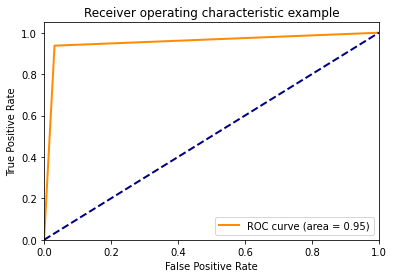

In [87]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_test - 1, rbf_ypred - 1)

# Compute the AUC (area under the curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


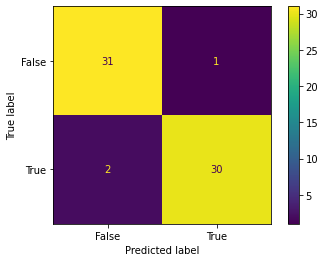

In [88]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
 
# Plot the confusion matrix
confusion_matrix = metrics.confusion_matrix(Y_test - 1, rbf_ypred - 1)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()